<a href="https://colab.research.google.com/github/gsingla21/Machine_Learning/blob/main/Na%C3%AFve%20Bayes%20and%20K-NN%20Classifier/ML_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gourish Singla
#101803698
#CoE-15

#Q1

Loading dataset

In [ ]:
import pandas as pd
url='/content/drive/MyDrive/ML assignments/Assignment 7/Dataset/message.txt'
dataset=pd.read_csv(url,sep='\t',header=None)

In [ ]:
dataset

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Importing Packages

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

Downloading Stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Preprocessing with corpus, 

case matching,stopword removal, stemming, tokenization

In [ ]:
stemming = PorterStemmer()
corpus = []

for i in range (0,len(dataset)):
  s1=re.sub('[^a-zA-Z]', repl=' ', string=dataset[1][i])
  s1.lower()
  s1 = s1.split()
  s1 = [stemming.stem(word) for word in s1 if word not in set(stopwords.words('english'))]
  s1 = ' '.join(s1)
  corpus.append(s1)
corpus

['Go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'Ok lar joke wif u oni',
 'free entri wkli comp win FA cup final tkt st may text FA receiv entri question std txt rate T C appli',
 'U dun say earli hor U c alreadi say',
 'nah I think goe usf live around though',
 'freemsg hey darl week word back I like fun still Tb ok xxx std chg send rcv',
 'even brother like speak they treat like aid patent',
 'As per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner As valu network custom select receivea prize reward To claim call claim code KL valid hour',
 'had mobil month U R entitl updat latest colour mobil camera free call the mobil updat Co free',
 'I gonna home soon want talk stuff anymor tonight k I cri enough today',
 'six chanc win cash from pound txt csh send cost p day day tsandc appli repli HL info',
 'urgent you week free membership prize jackpot txt word claim No T C www dbuk net lccltd pobo

Tokenization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer =CountVectorizer()

In [ ]:
x = countvectorizer.fit_transform(corpus).toarray()

Now we have a numeric vector that has been converted from a string of text.

In [ ]:
x.shape

(5572, 6379)

In [ ]:
y=dataset[0].values
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

Divide data into train and test randomly using a train-test split in the ratio of 70:30.



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, stratify=y,random_state=100)

**Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
multinomialnb = MultinomialNB()
multinomialnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = multinomialnb.predict(x_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1448
        spam       0.89      0.94      0.92       224

    accuracy                           0.98      1672
   macro avg       0.94      0.96      0.95      1672
weighted avg       0.98      0.98      0.98      1672



0.9766746411483254

#Q2

In [ ]:
from sklearn import datasets
dataset=datasets.load_iris()
dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
dataset=pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                     columns= dataset['feature_names'] + ['target'])

In [ ]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
X=dataset.iloc[:,:-1]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y=dataset.iloc[:,-1]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, stratify=y)

In [ ]:
X_train.shape

(105, 4)

In [ ]:
y_train.shape

(105,)

As the made split is random, indexes are required to be reset.

In [ ]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [ ]:
#Computing class_priors

import numpy as np
train_size=X_train.shape[0]
class_priors={}
for outcome in np.unique(Y_train):
  outcome_count = sum(Y_train == outcome)
  class_priors[outcome] = outcome_count / train_size

print(class_priors)

{0.0: 0.3333333333333333, 1.0: 0.3333333333333333, 2.0: 0.3333333333333333}


In [ ]:
def fit(x, y):
  mean = x.groupby(by=y).mean()
  var = x.groupby(by=y).var()
  return mean, var

In [ ]:
mean2, var2 = fit(X_train, y_train)

In [ ]:
mean2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,5.031429,3.488571,1.480000,0.262857
1.0,5.868571,2.740000,4.254286,1.320000
2.0,6.557143,3.011429,5.540000,1.994286


In [ ]:
var2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,0.103983,0.123395,0.034588,0.013580
1.0,0.268101,0.117765,0.218437,0.045765
2.0,0.430168,0.108101,0.297176,0.082319


In [ ]:
m = np.array(mean2)
v = np.array(var2)

In [ ]:
mean_var = []
#len_row = []
for i in range(len(m)):
  m_row = m[i]
  #len_row.append(len(m_row))
  v_row = v[i]
  for a, b in enumerate(m_row):
    mean = b
    var = v_row[a]
    mean_var.append([mean, var])

In [ ]:
mean_var2 = np.array(mean_var)
n_class = len(np.unique(y))
# now to separate mean variance by class, we use numpy vsplit
s = np.vsplit(mean_var2, n_class)

In [ ]:
s

[array([[5.03142857, 0.10398319],
        [3.48857143, 0.12339496],
        [1.48      , 0.03458824],
        [0.26285714, 0.01357983]]), array([[5.86857143, 0.26810084],
        [2.74      , 0.11776471],
        [4.25428571, 0.21843697],
        [1.32      , 0.04576471]]), array([[6.55714286, 0.43016807],
        [3.01142857, 0.10810084],
        [5.54      , 0.29717647],
        [1.99428571, 0.08231933]])]

In [ ]:
def calculate_probability(x, mean, stdev):
    ''' This function calculates the class probability using gaussian distribution '''
    exponent = math.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

In [ ]:
X_test=np.array(X_test)

Probability of each X_test example, corresponding to each individual class.

In [ ]:
prob=[]
for j in range(len(X_test)):
  xs=X_test[j]
  for i in range(n_class):
    # first class
    probz=[]
    class_one = s[i]
    for k in range(len(class_one)):
      # first value in class one
      class_one_x_mean = class_one[k][0]
      class_one_x_var = class_one[k][1]

		  # pull the x values that correspond to the right index of 
		  # mean, median, mode. 
      x_value = xs[k]
      # now calculate the probabilities of each class. 
      probz.append([calculate_probability(x_value, class_one_x_mean, math.sqrt(class_one_x_var))])
    prob.append([j,i,probz])
  

In [ ]:
prob

[[0,
  0,
  [[6.324619129404263e-08],
   [0.6159664106100949],
   [7.24711161427778e-97],
   [3.675259923056519e-54]]],
 [0,
  1,
  [[0.10595071912920913],
   [0.6705513786202724],
   [0.04229959497851097],
   [0.0024203062782190924]]],
 [0,
  2,
  [[0.5305809630730189],
   [1.1701380867837663],
   [0.7080780139122476],
   [1.2992109597154633]]],
 [1,
  0,
  [[1.8982421015431294e-06],
   [0.6159664106100949],
   [5.82148836700315e-107],
   [3.1632720825968196e-73]]],
 [1,
  1,
  [[0.2122592862361057],
   [0.6705513786202724],
   [0.01352049402223181],
   [5.4479987756452024e-06]]],
 [1,
  2,
  [[0.5940035175842134],
   [1.1701380867837663],
   [0.7273983821788536],
   [0.5116298534132512]]],
 [2,
  0,
  [[1.8982421015431294e-06],
   [0.43171755544004486],
   [2.8382493489085277e-87],
   [1.4962201131050844e-66]]],
 [2,
  1,
  [[0.2122592862361057],
   [0.8724776959302192],
   [0.1101925434523676],
   [5.172240315997897e-05]]],
 [2,
  2,
  [[0.5940035175842134],
   [1.2126435576548678],

product of probability of each X_test example, corresponding to each individual class.

In [ ]:
prob2=[]
for j in range(len(X_test)):
  xs=X_test[j]
  g=[]
  for i in range(n_class):
    # first class
    probz=[]
    class_one = s[i]
    f=0
    for k in range(len(class_one)):
      # first value in class one
      class_one_x_mean = class_one[k][0]
      class_one_x_var = class_one[k][1]

		  # pull the x values that correspond to the right index of 
		  # mean, median, mode. 
      x_value = xs[k]
      # now calculate the probabilities of each class. 
      z=calculate_probability(x_value, class_one_x_mean, math.sqrt(class_one_x_var))
      f=f+np.log(z)
    f=f*class_priors[i]
    g.append(f)

  prob2.append([j,g])
  

In [ ]:
prob2

[[0, [-120.48963865537769, -3.9437583707500914, -0.18670160912795292]],
 [1, [-141.73709965687092, -6.1244708459981725, -0.4507277005102986]],
 [2, [-121.6213186034864, -4.587170160210384, -0.3576090680118639]],
 [3, [-123.58420400296214, -4.688742928452817, -0.3813638967071288]],
 [4, [-57.72812973466541, 0.047958586383471793, -2.031556037549152]],
 [5, [0.6802817441849796, -12.181853636021021, -17.6996814392117]],
 [6, [-69.00962435769141, -0.34389591555510723, -1.1558373460408324]],
 [7, [-102.97222137759191, -2.6587773261633743, -0.2601760766178538]],
 [8, [-73.85855864342297, -0.6767082296587912, -1.2093794516930487]],
 [9, [-52.504337957734755, -0.06258868689854032, -2.7955961585914673]],
 [10, [-1.7558554886834599, -11.768336976523035, -18.409763676544628]],
 [11, [-204.1883364416674, -10.833042081507422, -2.089018817048749]],
 [12, [-138.98287802172854, -4.868484198912619, -0.22050144919356318]],
 [13, [-97.99888036205358, -2.0892125793427323, -0.9469665818414127]],
 [14, [-0.4

Max of products of probability of each X_test example, corresponding to each individual class.

In [ ]:
prob3=[]
for j in range(len(X_test)):
  xs=X_test[j]
  max=-99999999999
  g=-10
  for i in range(n_class):
    # first class
    probz=[]
    class_one = s[i]
    f=0
    for k in range(len(class_one)):
      # first value in class one
      class_one_x_mean = class_one[k][0]
      class_one_x_var = class_one[k][1]

		  # pull the x values that correspond to the right index of 
		  # mean, median, mode. 
      x_value = xs[k]
      # now calculate the probabilities of each class. 
      z=calculate_probability(x_value, class_one_x_mean, math.sqrt(class_one_x_var))
      f=f+np.log(z)
    if (f>=max):
      max=f
      g=i
  prob3.append([j,g])
  

In [ ]:
prob3

[[0, 2],
 [1, 2],
 [2, 2],
 [3, 2],
 [4, 1],
 [5, 0],
 [6, 1],
 [7, 2],
 [8, 1],
 [9, 1],
 [10, 0],
 [11, 2],
 [12, 2],
 [13, 2],
 [14, 0],
 [15, 0],
 [16, 1],
 [17, 0],
 [18, 0],
 [19, 0],
 [20, 1],
 [21, 1],
 [22, 0],
 [23, 0],
 [24, 0],
 [25, 1],
 [26, 1],
 [27, 0],
 [28, 1],
 [29, 2],
 [30, 2],
 [31, 2],
 [32, 1],
 [33, 1],
 [34, 1],
 [35, 0],
 [36, 0],
 [37, 2],
 [38, 1],
 [39, 0],
 [40, 0],
 [41, 2],
 [42, 1],
 [43, 1],
 [44, 2]]

Second column represent predicted Y_label

In [ ]:
y_label=[]
for i in prob3:
  y_label.append(i[1])
y_label=np.array(y_label)
y_label

array([2, 2, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1,
       2])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_label))
accuracy_score(y_test,y_label)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.94      1.00      0.97        15
         2.0       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



0.9777777777777777

In [ ]:
confusion_matrix(y_test,y_label)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

Built-in

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [ ]:
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([2., 2., 2., 2., 1., 0., 1., 2., 1., 1., 0., 2., 2., 2., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 2., 2., 2., 1., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 1., 1., 2.])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.94      1.00      0.97        15
         2.0       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



0.9777777777777777

In [ ]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

#Q3

In [ ]:
from sklearn import datasets
dataset=datasets.load_iris()
dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
dataset=pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                     columns= dataset['feature_names'] + ['target'])

In [ ]:
X=dataset.iloc[:,:-1]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y=dataset.iloc[:,-1]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

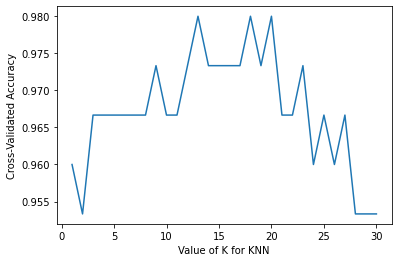

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
print("best_score_: ",grid.best_score_)
print("best_params_: ",grid.best_params_)
print("best_estimator_: ",grid.best_estimator_)

best_score_:  0.9800000000000001
best_params_:  {'n_neighbors': 13}
best_estimator_:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3, stratify=y,random_state=100)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.94      1.00      0.97        15
         2.0       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

